# Pricipal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique that is commonly used in machine learning and data analysis. The main idea behind PCA is to transform high-dimensional data into a lower-dimensional space while preserving as much variance as possible. This can help in simplifying the data and retaining its essential features.

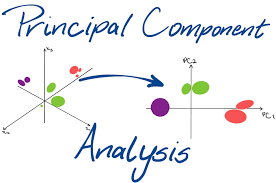

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_theme()

# Load the Wine dataset
wine_data = load_wine()
columns = wine_data.feature_names + ['target']

# Create a DataFrame
wine_df = pd.DataFrame(data=np.c_[wine_data.data, wine_data.target], columns=columns)

# Separate features and target
X = wine_df.drop('target', axis=1).to_numpy()
y = wine_df['target'].to_numpy()

**Step 1: Standardize the Data**

Before applying PCA, it's essential to standardize the data by subtracting the mean and dividing by the standard deviation for each feature. This ensures that all features have the same scale.

To standardize the data, we center each row by replacing the value $x$ with its average.
$$
x - \text{mean}
$$

Due to potential significant variations in the ranges of data values, it is crucial to prevent PCA from potentially identifying inaccurate directions in characterizing data variability. To address this, we normalize the data across each variable by computing the z-scores, which involves dividing by the standard deviation.
$$
z = \frac{x - \text{mean}}{\text{standard devation}}
$$

Finally, we form the $m\times n$ matrix $A$.

**Step 2: Calculate the Covariance Matrix**

The covariance matrix provides information about how the features in the data are correlated. Calculate the covariance matrix for the standardized data.
$$
S = \frac{1}{n-1}AA^T
$$

If our dataset is centered, the matrix mentioned above serves as the covariance matrix. Conversely, if our dataset is scaled, the matrix $S$ represents the correlation matrix. The diagonal elements contain variances (or correlations) corresponding to each variable, while the off-diagonal elements depict covariances (or correlations) between pairs of variables. A positive covariance signifies a direct relationship, where an increase in one variable corresponds to an increase in the other, while a negative covariance indicates an inverse relationship, with one variable increasing as the other decreases. This matrix is symmetric and has dimensions $m \times m$, ensuring that its columns align in size with the columns of $A$,

**Step 3: Compute the Eigenvectors and Eigenvalues**

Find the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the directions of maximum variance, and eigenvalues indicate the magnitude of the variance in those directions.

The eigenvectors mentioned refer to the columns of the matrix $U$ within the singular value decomposition of $A$, excluding the factor $n-1$. Additionally, we represent the eigenvalues as $\sigma_{i}^{2}$. This representation is analogous to the Singular Value Decomposition applied to our adjusted training set matrix $A$.
$$
A = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^{T}, 
$$

In [2]:
# Extract features and target
X = wine_df.drop('target', axis=1).to_numpy()
y = wine_df['target'].to_numpy()

# Center the data
A = X - X.mean(axis=0)

# Perform Singular Value Decomposition (SVD)
U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

# Print shapes
print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (178, 13)
np.shape(sigma) = (13,)
np.shape(Vt) = (13, 13) 



In [3]:
# Reconstruct the original data matrix
A_reconstructed = U @ np.diag(sigma) @ Vt

# Check if the reconstruction is close to the original matrix
print(f"A == U * sigma_mat * Vt: {np.allclose(A, A_reconstructed)} \n")

A == U * sigma_mat * Vt: True 



**Step 4: Select Principal Components**

Choose the top k eigenvectors, where k is the desired dimensionality of the reduced data (usually a smaller number than the original dimensionality).

We organize the eigenvalues obtained in the preceding step in descending order. The initial principal component $PC_1$ aligns with the direction of the first eigenvector, the second principal component $PC_2$ aligns with the direction of the second eigenvector, and so forth. The components of each $PC_i$ are referred to as loading scores, providing insights into how $PC_i$ forms a linear combination of features.

**Step 5: Project the Data**

Create a new matrix by multiplying the standardized data by the selected k eigenvectors. This results in a lower-dimensional representation of the original data.

We project the data points (representing columns of matrix $A$) onto the chosen principal components, corresponding to specific eigenvectors of matrix $S$. According to the Eckart-Young theorem, we understand that the line closest to the data points aligns with the direction of $PC_1$, and so forth. Here, "closest" is defined in terms of minimizing the perpendicular least squares distance.

Furthermore, the total variance, indicated by the trace of matrix $S$, is
$$
T = \text{trace}(S) = \frac{\sigma_{1}^{2} + \dots + \sigma_{m}^{2}}{n-1},
$$

and the $i$-th principle component $PC_i$ explains
$$
\frac{\sigma_{i}^{2}/(n-1)}{T} = \frac{\sigma_{i}^{2}}{\sigma_{1}^{2} + \dots + \sigma_{m}^{2}}
$$

The cumulative variation is visualized through a scree plot, illustrating the percentages of variation attributed to each principal component ($PC_i$). The eigenvalue for $PC_i$, or the squared singular value $\sigma_{i}^{2}$, is determined by the sum of squared distances from the points projected onto $PC_i$ to the origin.

---

To project the data within matrix $A$ onto the axes defined by the first two principal components, the computation involves multiplying A by the matrix $[PC_1 PC_2]$.

In [4]:
# Extract the first four principal components
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

# Extract the first two principal components for dimensionality reduction
W2 = Vt.T[:, :2]
X2D = A.dot(W2)

# Print the shapes of the principal components and the reduced dataset
print(f"Shape of PC1: {PC1.shape}")
print(f"Shape of PC2: {PC2.shape}")
print(f"Shape of PC3: {PC3.shape}")
print(f"Shape of PC4: {PC4.shape}")
print(f"Shape of X2D: {X2D.shape}")

Shape of PC1: (13,)
Shape of PC2: (13,)
Shape of PC3: (13,)
Shape of PC4: (13,)
Shape of X2D: (178, 2)


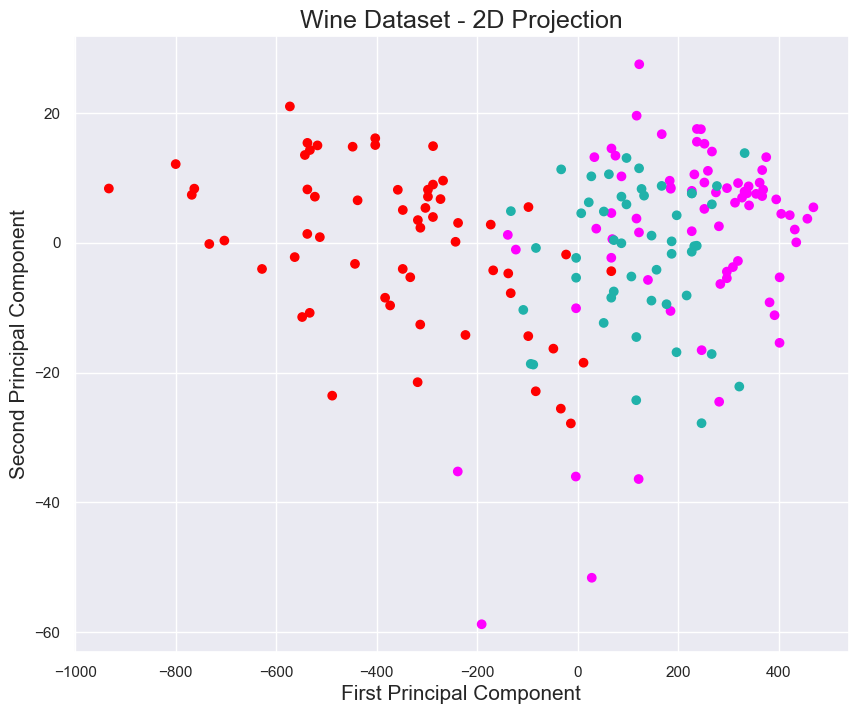

In [5]:
def colors(label):
    if label == 0:
        return "red"  # Class 0 in the Wine dataset
    elif label == 1:
        return "magenta"  # Class 1 in the Wine dataset
    else:
        return "lightseagreen"  # Class 2 in the Wine dataset

# Apply the colors function to create a list of colors for each data point
c = [colors(label) for label in y]

# Plot the reduced dataset
plt.figure(figsize=(10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c=c)
plt.xlabel("First Principal Component", fontsize=15)
plt.ylabel("Second Principal Component", fontsize=15)
plt.title("Wine Dataset - 2D Projection", fontsize=18)
plt.show()

Explained Variance Ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


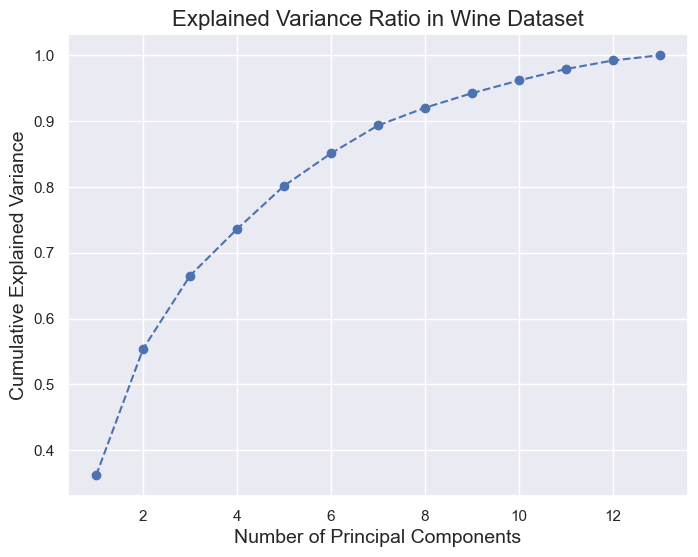

In [6]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# Scale the data
scaled_X = preprocessing.scale(X)

# Perform PCA
pca = PCA()
pca.fit(scaled_X)

# Print explained variance ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Explained Variance Ratio in Wine Dataset', fontsize=16)
plt.grid(True)
plt.show()

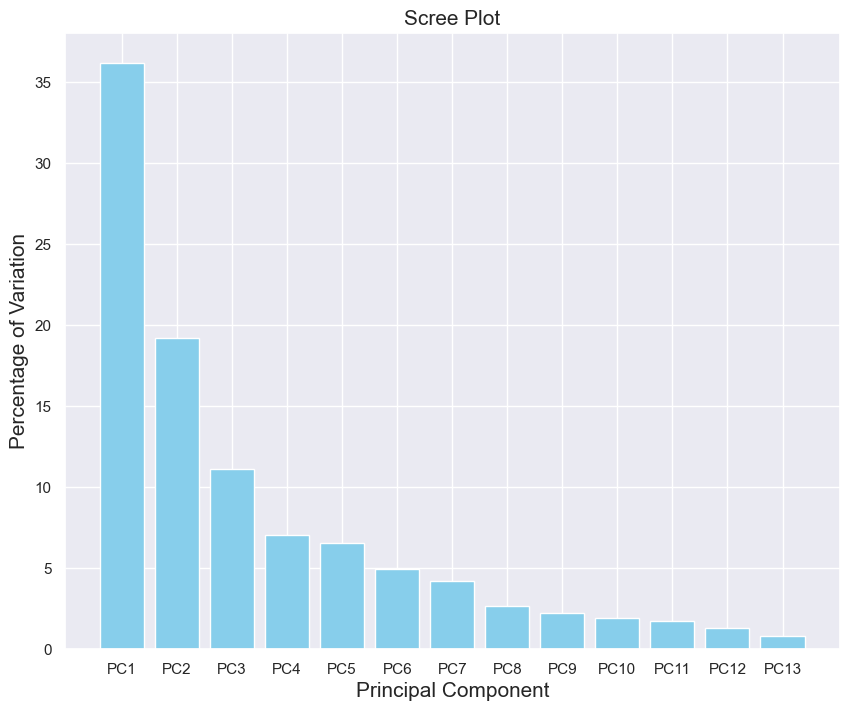

In [7]:
# Calculate the explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Calculate the percentage of variation
per_var = explained_variance * 100

# Number of principal components to plot
num_components = len(per_var)

# Create labels for the principal components
labels = [f"PC{i}" for i in range(1, num_components + 1)]

# Plot the Scree Plot
plt.figure(figsize=(10, 8))
plt.bar(x=range(1, num_components + 1), height=per_var, tick_label=labels, color='skyblue')
plt.xlabel('Principal Component', fontsize=15)
plt.ylabel('Percentage of Variation', fontsize=15)
plt.title('Scree Plot', fontsize=15)
plt.show()


In [8]:
# Choose the number of principal components to consider
num_components = 4

# Create labels for the principal components
pc_labels = [f"PC{i}" for i in range(1, num_components + 1)]

# Transpose the pca.components_ array and select only the first num_components
components_df = pd.DataFrame(data=pca.components_[:num_components].T, columns=pc_labels, index=wine_data.feature_names)

# Print the DataFrame
print(components_df)

                                   PC1       PC2       PC3       PC4
alcohol                       0.144329 -0.483652 -0.207383 -0.017856
malic_acid                   -0.245188 -0.224931  0.089013  0.536890
ash                          -0.002051 -0.316069  0.626224 -0.214176
alcalinity_of_ash            -0.239320  0.010591  0.612080  0.060859
magnesium                     0.141992 -0.299634  0.130757 -0.351797
total_phenols                 0.394661 -0.065040  0.146179  0.198068
flavanoids                    0.422934  0.003360  0.150682  0.152295
nonflavanoid_phenols         -0.298533 -0.028779  0.170368 -0.203301
proanthocyanins               0.313429 -0.039302  0.149454  0.399057
color_intensity              -0.088617 -0.529996 -0.137306  0.065926
hue                           0.296715  0.279235  0.085222 -0.427771
od280/od315_of_diluted_wines  0.376167  0.164496  0.166005  0.184121
proline                       0.286752 -0.364903 -0.126746 -0.232071


In [9]:
# Fit and transform the scaled data using PCA
pca = PCA()
pca.fit(scaled_X)
pca_data = pca.transform(scaled_X)

# Create labels for the principal components
pc_labels = [f"PC{i}" for i in range(1, pca_data.shape[1] + 1)]

# Create a DataFrame for the transformed data
pca_df = pd.DataFrame(pca_data, columns=pc_labels)

# Print the DataFrame
display(pca_df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [10]:
# Standardize the features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=4)  # Choose the number of components you want (4)
pca_data = pca.fit_transform(scaled_X)

# Create labels for the principal components
pc_labels = [f"PC{i}" for i in range(1, pca_data.shape[1] + 1)]

# Create a DataFrame for the transformed data
pca_df = pd.DataFrame(pca_data, columns=pc_labels)

# Add target labels to the PCA DataFrame
projected_df = pd.concat([pca_df, wine_df['target']], axis=1, names=['PC1', 'PC2', 'PC3', 'PC4', 'target'])

# Print the DataFrame
display(pca_df)
display(projected_df)

# Show the color associated to the different types of wine in the dataset
projected_df["color"] = c
projected_df

,PC1,PC2,PC3,PC4
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902
3,3.757066,-2.756372,-0.176192,0.567983
4,1.008908,-0.869831,2.026688,-0.409766
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527
174,-2.601956,-1.757229,0.207581,0.349496
175,-2.677839,-2.760899,-0.940942,0.312035
176,-2.387017,-2.297347,-0.550696,-0.688285


,PC1,PC2,PC3,PC4,target
0,3.316751,-1.443463,-0.165739,-0.215631,0.0
1,2.209465,0.333393,-2.026457,-0.291358,0.0
2,2.516740,-1.031151,0.982819,0.724902,0.0
3,3.757066,-2.756372,-0.176192,0.567983,0.0
4,1.008908,-0.869831,2.026688,-0.409766,0.0
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,2.0
174,-2.601956,-1.757229,0.207581,0.349496,2.0
175,-2.677839,-2.760899,-0.940942,0.312035,2.0
176,-2.387017,-2.297347,-0.550696,-0.688285,2.0


,PC1,PC2,PC3,PC4,target,color
0,3.316751,-1.443463,-0.165739,-0.215631,0.0,red
1,2.209465,0.333393,-2.026457,-0.291358,0.0,red
2,2.516740,-1.031151,0.982819,0.724902,0.0,red
3,3.757066,-2.756372,-0.176192,0.567983,0.0,red
4,1.008908,-0.869831,2.026688,-0.409766,0.0,red
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,2.0,lightseagreen
174,-2.601956,-1.757229,0.207581,0.349496,2.0,lightseagreen
175,-2.677839,-2.760899,-0.940942,0.312035,2.0,lightseagreen
176,-2.387017,-2.297347,-0.550696,-0.688285,2.0,lightseagreen


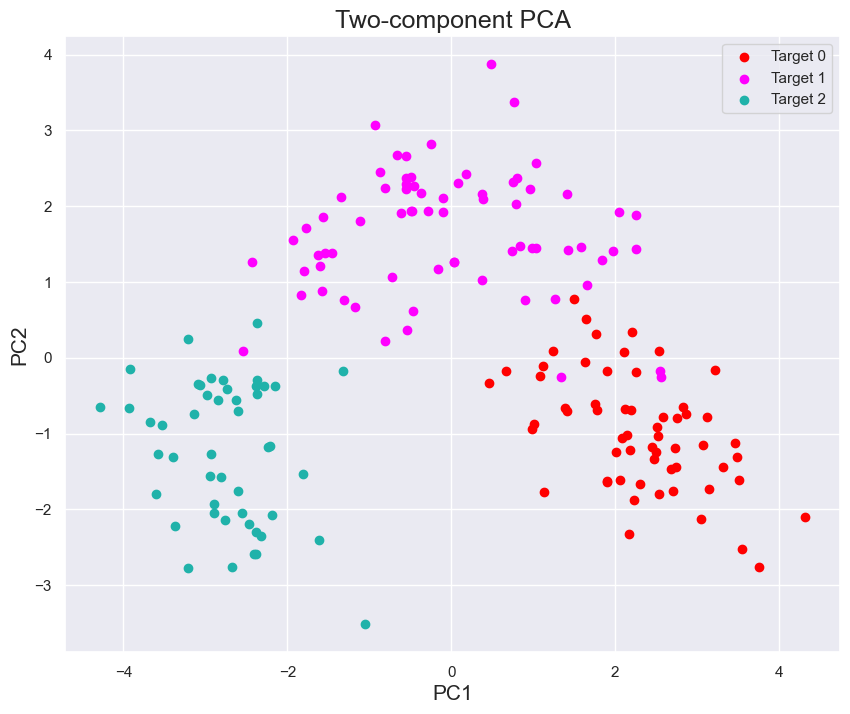

In [11]:
targets = [0, 1, 2]  # Wine dataset has target values 0, 1, and 2
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize=(10, 8))

# Plot each target class separately
for target, color in zip(targets, colors):
    # Select rows corresponding to the current target
    temp_df = projected_df[projected_df['target'] == target]
    
    # Scatter plot for the current target
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c=color,
                label=f"Target {target}")
    
# Set axis labels and title
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.title('Two-component PCA', fontsize=18)

# Add legend to differentiate targets
plt.legend()

# Display the plot
plt.show()

### What exactly is this scatter plot showing?

**Visualization of Dimensionality Reduction**

PC1 and PC2 represent the first two principal components, and they are chosen because they capture the most significant amount of variance in the data. The scatter plot visualizes how the data points are distributed in this reduced two-dimensional space.

**Data Separation**

In the scatter plot, each point represents an observation in the dataset, and its position is determined by its values along PC1 and PC2. By plotting the data points colored by their original target labels (in the case of the wine dataset, the wine classes), we can see if the classes are well-separated or if there is overlap.

**Insights into Class Relationships**

A well-separated distribution in the PC1-PC2 space implies that the first two principal components are effective at distinguishing between different classes. Overlapping points suggest that the classes may not be easily separable based on the selected principal components.

**Reduced Dimensional Representation**

PCA is useful for reducing the dimensionality of the data while preserving most of its variability. PC1 and PC2 provide a compressed representation of the original features.

# Conclusion

In this series of code interactions, we explored principal component analysis (PCA) using the Wine dataset. Initially, we performed PCA manually on the Wine dataset, centering the data, calculating the singular value decomposition, and validating the reconstruction of the original data. Later, we applied PCA to the Wine dataset using the scikit-learn library. We visualized the variance explained by each principal component, created a scree plot, and examined the linear combinations of original features represented by each principal component. Finally, we projected the data onto the first two principal components and visualized the results, gaining insights into the distribution of wine samples in the reduced-dimensional space. Throughout the process, we addressed data preprocessing, scaling, and demonstrated how to handle specific errors related to dataset structures.